In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_bn_weights(checkpoint):
    bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
    bns_weights_all = np.concatenate([checkpoint['model'][layer].cpu().numpy() for layer in bn_layers])
    bns_weights_all[::-1].sort()
    return bns_weights_all

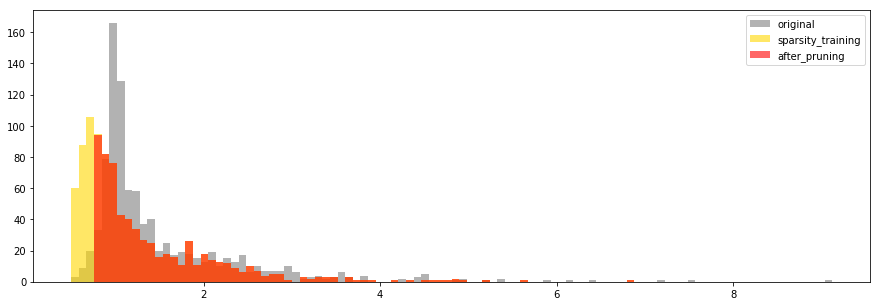

In [5]:
# load original weights before sparsity training
orig = torch.load("weights/slimmerer_first10000_bestconverted.pt")
orig_weights_all = get_bn_weights(orig)

# load sparse weights
checkpoint = torch.load("weights/best_tiny_slimmerer_first_10000_bdd100k_best.pt")
bns_weights_all = get_bn_weights(checkpoint)

plt.figure(figsize=(15,5))

# plot original weights
count, bins, ax = plt.hist(orig_weights_all, bins=100,color='black', alpha=0.3)

# plot sparse weights
plt.hist(bns_weights_all, bins=bins, color='gold', alpha=0.6)

#plot pruned weights
prune_extent = 0.3
plt.hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):], bins=bins, color='red',alpha=0.6)

plt.legend(['original','sparsity_training','after_pruning'])

plt.show()

---

### To put the model into the correct dict format for conversion

In [40]:
"""
pt_original: the raw pruned .pt after running prune.py
pt_new: .pt in correct dict format, for conversion to .weights
"""
def output_pruned_model(pt_original, pt_new):
    pruned_model = torch.load(pt_original)
    pruned_pt = {}
    pruned_pt['model'] = pruned_model
    torch.save(pruned_pt, pt_new)

In [41]:
# e.g.
output_pruned_model("prune_0.6_0.2/prune.pt",'prune_0.6_0.2/prune_model2.pt')
# then run convert script